# Telco Customer Churn Analysis

This project performs an end-to-end exploratory churn analysis on a telecom
customer dataset to identify key drivers of customer attrition and extract
actionable business insights.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Convert TotalCharges to numeric (it has blank strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing values (very small fraction)
df.dropna(inplace=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

((7032, 21), None)

## Churn Distribution

Understanding the baseline churn rate is critical before modeling.

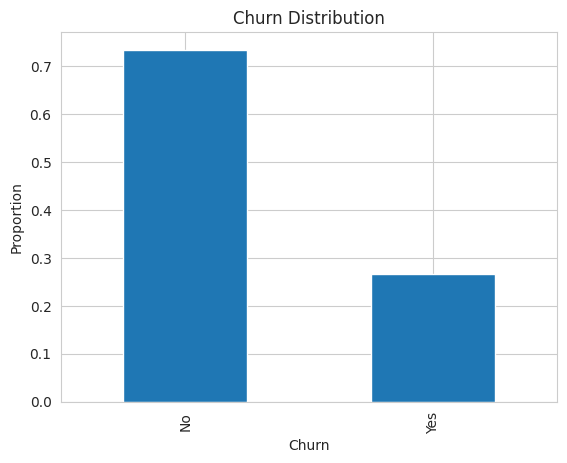

In [4]:
df["Churn"].value_counts(normalize=True).plot(kind="bar")
plt.title("Churn Distribution")
plt.ylabel("Proportion")
plt.show()

## Numerical Feature Analysis

We analyze how tenure and billing amounts differ between churned and retained customers.

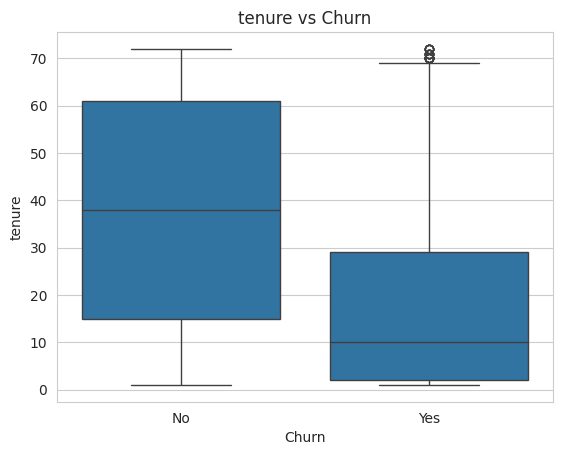

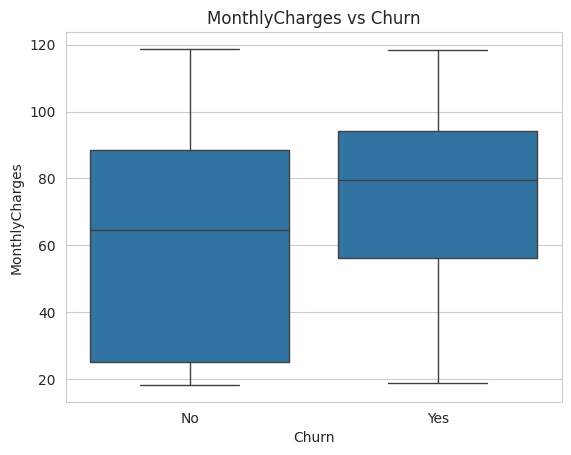

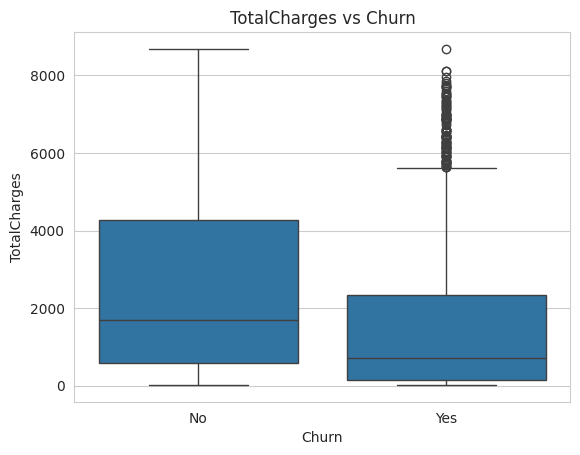

In [5]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

## Categorical Feature Analysis

We compare churn rates across key categorical variables.

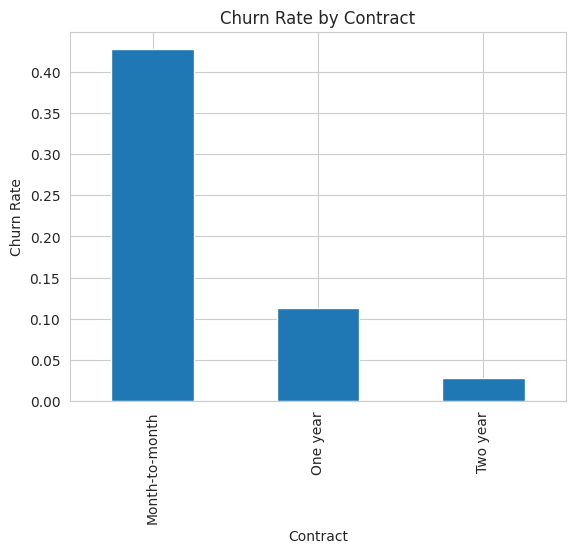

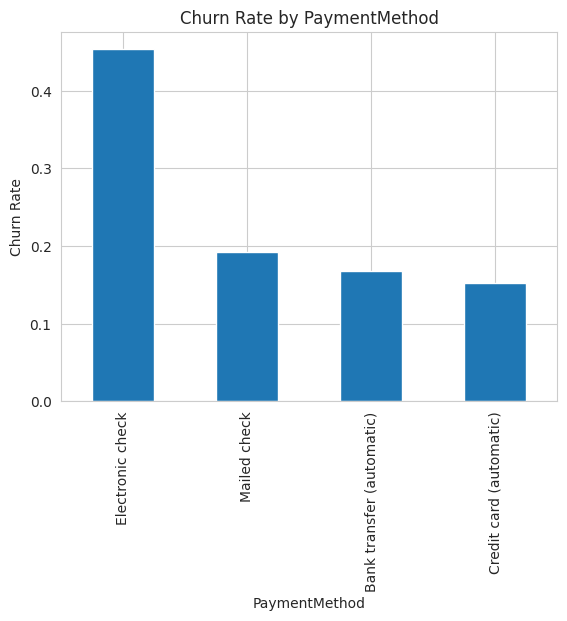

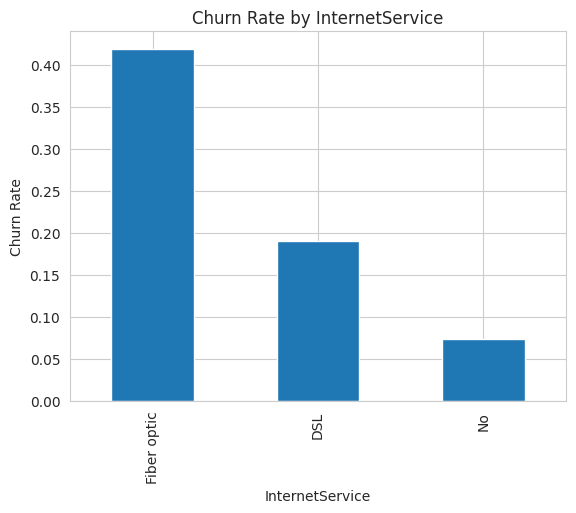

In [6]:
cat_cols = ["Contract", "PaymentMethod", "InternetService"]

for col in cat_cols:
    churn_rate = (
        df.groupby(col)["Churn"]
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)["Yes"]
        .sort_values(ascending=False)
    )

    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.show()

## Key Insights

- Churn is heavily concentrated among **early-tenure customers**
- **Month-to-month contracts** show extremely high churn compared to long-term contracts
- Customers using **electronic checks** churn at nearly double the average rate
- Higher monthly charges correlate strongly with churn when customers lack long-term commitment

## Next Steps

- Feature engineering (tenure buckets, charge-to-tenure ratios)
- Predictive modeling (Logistic Regression, XGBoost)
- Model explainability using SHAP
- Retention strategy simulation and ROI estimation
